# Assignment:Implementing SGDClassifiers

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
X = load_boston().data
Y = load_boston().target

In [4]:
from sklearn.model_selection import train_test_split
X_tra, X_tes, Y_tra, Y_tes = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_tra.shape)
print(X_tes.shape)
print(Y_tra.shape)
print(Y_tes.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [5]:
scaler= preprocessing.StandardScaler().fit(X_tra)
X_train=scaler.transform(X_tra)
X_test=scaler.transform(X_tes)

In [6]:
custom=pd.DataFrame(data=X_train)
custom['price']=Y_tra

In [7]:
def sgd(alpha, lrr_var, eta=0.01, pow_t=0.25,n_iter=1):
    clf=SGDRegressor(alpha=alpha,  learning_rate=lrr_var, eta0=eta, power_t=pow_t, n_iter=n_iter)
    clf.fit(X_train,Y_tra)
    y_pred=clf.predict(X_test)
    
    #scatter plot
    plt.scatter(Y_tes,y_pred)
    plt.title('Actual Values VS Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    print('**************************************')
    sgd_error=mean_squared_error(Y_tes,y_pred)
    print('mean square error=', sgd_error)
    
    return clf.coef_, clf.intercept_, sgd_error

In [8]:
def custom_model(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=1):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return w_new, b_new



In [9]:
def predict(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)



In [10]:
def ploting(X_test,y_pred):
    #scatter plot
    plt.scatter(Y_tes,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title('Actual Values VS Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()
    print('*************************************')
    
    
    manual_error=mean_squared_error(Y_tes,y_pred)
    print('mean square error=',manual_error)
    
    return manual_error

__Skearn SGDRegressor__

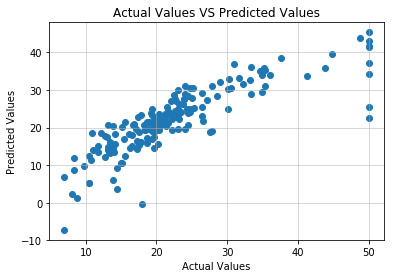

**************************************
mean square error= 27.757053239118395


In [14]:
w_sgd, b_sgd, error_sgd=sgd(alpha=0.0001, lrr_var='constant', eta=0.01, n_iter=1000)

__Custom implementation of SGDRegressor__

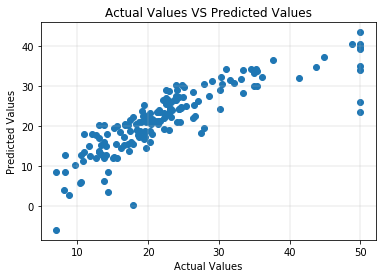

*************************************
mean square error= 27.401949693132224


In [20]:
w, b=custom_model(X=custom, lr_rate_variation='constant' , n_iter=1000)
y_pred=predict(X_test, w=w, b=b)
manual_error=ploting(X_test,y_pred)

In [21]:
b=w.reshape(13,1)

In [22]:
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13]
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Sklearn's SGD",w_sgd)
ptable.add_column("Weights of manual SGD",b)

# Printing the Table
print(ptable)

+-------+--------------------------+-----------------------+
| S.NO. | Weights of Sklearn's SGD | Weights of manual SGD |
+-------+--------------------------+-----------------------+
|   1   |   -1.3812233430359353    |     [-1.18969291]     |
|   2   |    0.6342440751923348    |      [0.76183188]     |
|   3   |   -0.11820806673036802   |      [-0.527319]      |
|   4   |    0.4512447404217142    |      [0.69989891]     |
|   5   |    -1.354866106534257    |     [-1.41940834]     |
|   6   |    3.1880799640744666    |      [2.47851379]     |
|   7   |  -0.016879860138361562   |     [-0.30013524]     |
|   8   |   -3.0270354416702983    |     [-2.78326128]     |
|   9   |     3.22408253504173     |      [2.20547065]     |
|   10  |    -2.17961223091745     |     [-1.07909456]     |
|   11  |    -2.156591952719235    |     [-2.12206703]     |
|   12  |    0.9947252014489741    |      [1.10438779]     |
|   13  |    -3.219698660547973    |     [-3.61071477]     |
+-------+---------------

# Conclusion

In [23]:
models = pd.DataFrame({'Vectorizer': ['SGD Regressor','Custom SGD Regressor'],'Mean_Sqaure_Error(MSE)':[27,27]}, columns = ["Vectorizer", "Mean_Sqaure_Error(MSE)"])
models

,Vectorizer,Mean_Sqaure_Error(MSE)
0,SGD Regressor,27
1,Custom SGD Regressor,27
